In [39]:
#import tools
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
#load datas
datasets = pd.read_csv('../datasets/led-30.csv',sep=',',header=None) #led-00,led-10 ,led-20,led-30
#print(datasets)

datasets.head()

,0,1,2,3,4,5,6,7
0,1,0,1,0,1,0,0,0
1,0,0,1,1,0,1,0,1
2,1,1,1,1,0,1,0,5
3,0,0,1,0,0,0,1,8
4,0,1,1,0,0,1,0,1


In [41]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
 1   1       2000 non-null   int64
 2   2       2000 non-null   int64
 3   3       2000 non-null   int64
 4   4       2000 non-null   int64
 5   5       2000 non-null   int64
 6   6       2000 non-null   int64
 7   7       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [42]:
datasets.describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.611000,0.533500,0.625000,0.573000,0.456500,0.663000,0.579000,4.483500
std,0.487645,0.499001,0.484244,0.494766,0.498229,0.472803,0.493843,2.851104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


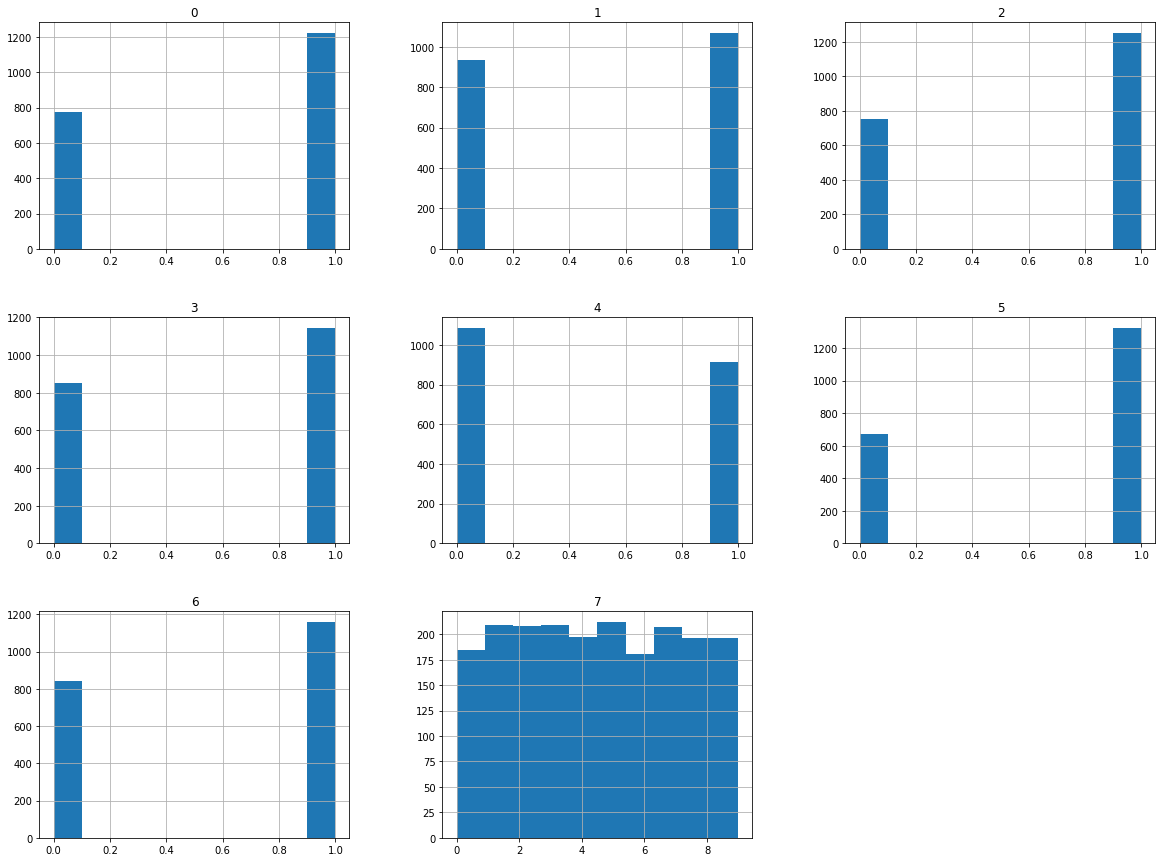

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
datasets.hist(figsize=(20,15))

plt.show()


In [44]:
corr_matrix = datasets.corr()
corr_matrix[7].sort_values(ascending=False,key=abs)

7    1.000000
1    0.179363
3    0.173736
0    0.147940
4   -0.078686
5    0.066754
6    0.041607
2   -0.001223
Name: 7, dtype: float64

In [45]:
X = datasets.values[:,:7]
print(X.shape)

y = datasets.values[:,7]
print(y.shape)

(2000, 7)
(2000,)


In [46]:
clf =DecisionTreeClassifier()
y_predict = cross_val_predict(clf,X,y,cv=3)

In [47]:
print(f'accuracy score: {accuracy_score(y,y_predict)}')
print(f'\nconfusion matrix:\n {confusion_matrix(y,y_predict)}')
print(f'\nclassification report:\n {classification_report(y,y_predict)}')

accuracy score: 0.267

confusion matrix:
 [[58 20 23 15 10 11  8 17 18  5]
 [19 78 15 20 33  7  4 26  3  4]
 [24 20 71 25 11 14  9 10 14 10]
 [14 20 27 59 11 17 11 24  6 20]
 [11 36 12 21 64 11  8 10  7 17]
 [22 17 17 19 19 41 25 13  9 30]
 [24 16 30 11 12 24 34  3 18  9]
 [24 39 11 31 20  8  1 59  4 10]
 [33 11 36 18 12 16 17  8 28 17]
 [20 11 10 29 23 26  6 16 13 42]]

classification report:
               precision    recall  f1-score   support

           0       0.23      0.31      0.27       185
           1       0.29      0.37      0.33       209
           2       0.28      0.34      0.31       208
           3       0.24      0.28      0.26       209
           4       0.30      0.32      0.31       197
           5       0.23      0.19      0.21       212
           6       0.28      0.19      0.22       181
           7       0.32      0.29      0.30       207
           8       0.23      0.14      0.18       196
           9       0.26      0.21      0.23       196

    ac

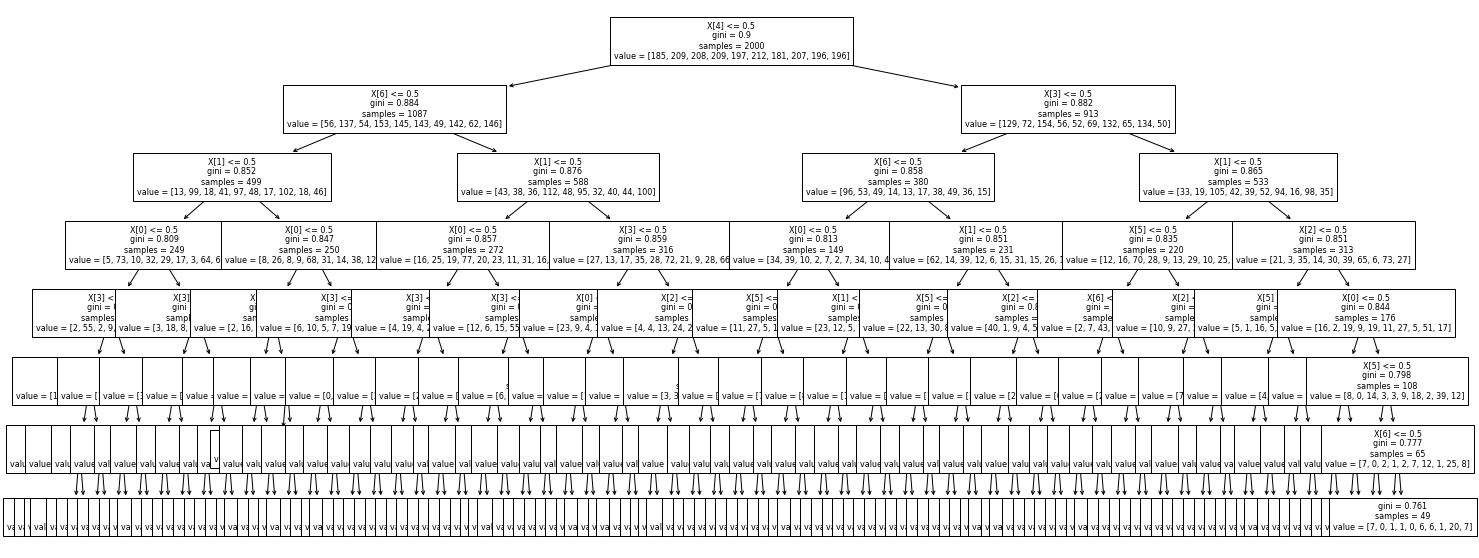

In [48]:
clf.fit(X,y)

plt.figure(figsize=(24,10))
plot_tree(clf,fontsize =8)
plt.show()